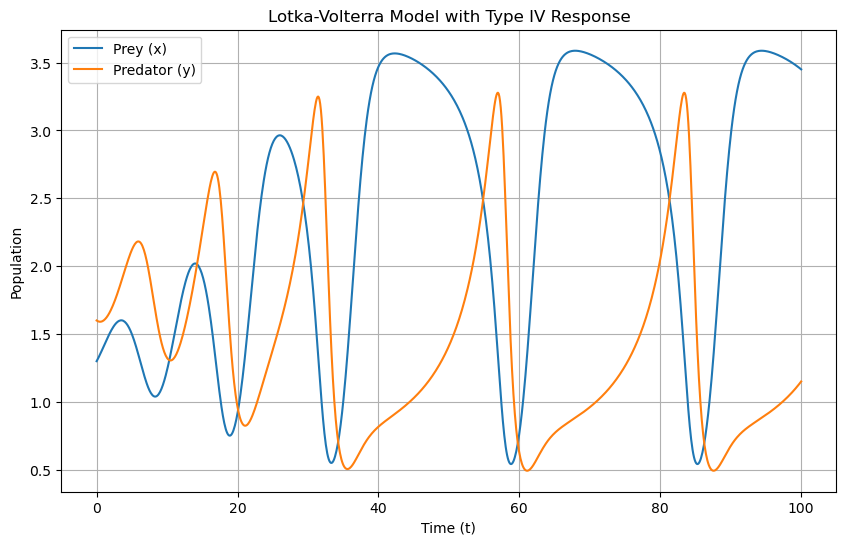

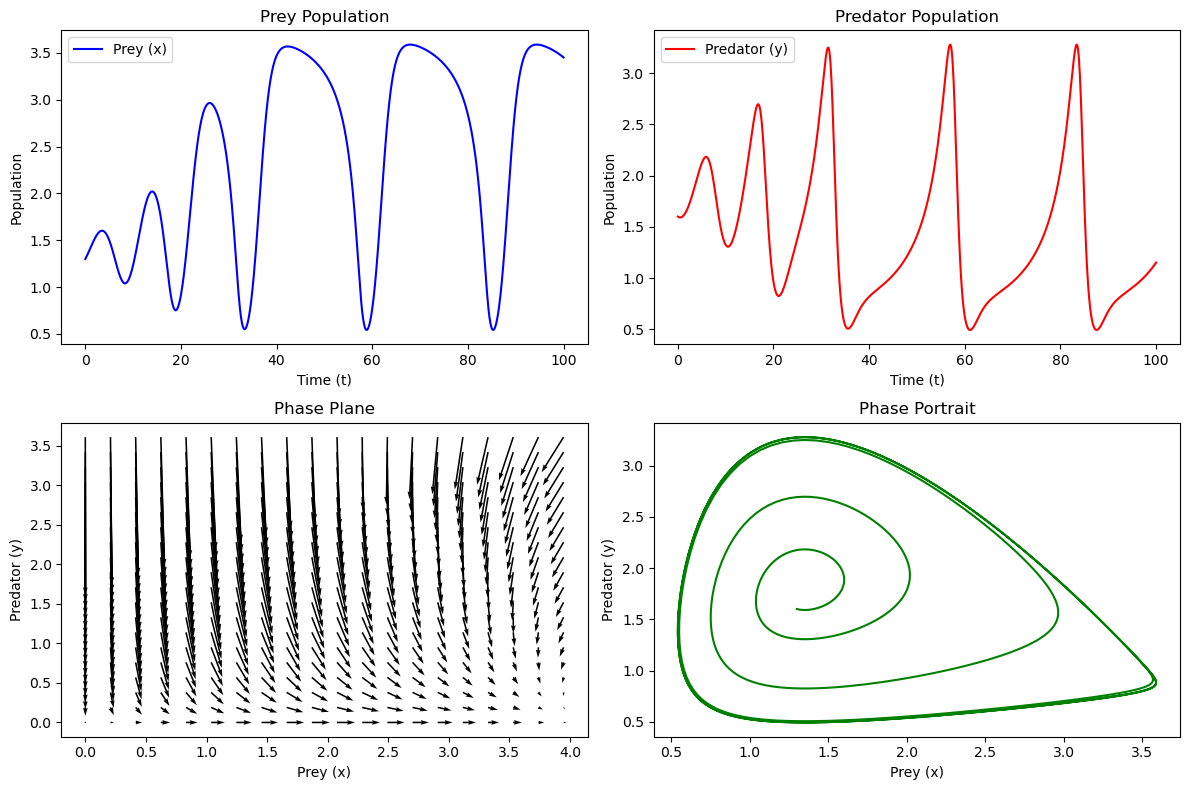

In [3]:
#Q1. Numerically solving predator-prey model with type IV functional response
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Defining system of predator prey model with type IV functional response
def system(y, t, alpha, beta, gamma, delta):
    x, y = y
    dxdt = x * (1 - x / gamma) - x * y / ((x**2/alpha) + x + 1)
    dydt = beta * delta * x * y / ((x**2/alpha) + x + 1) - delta * y
    return [dxdt, dydt]

# Parameters
alpha = 5.2
beta = 2.0
gamma = 4.1
delta = 2.5

# Initial conditions
x0 = 1.3
y0 = 1.6

# Time points
t = np.linspace(0, 100, 1000)

# Solving the system of equations
solution = odeint(system, [x0, y0], t, args=(alpha, beta, gamma, delta))
x_values = solution[:, 0]
y_values = solution[:, 1]

# Plot of the combined results
plt.figure(figsize=(10, 6))
plt.plot(t, x_values, label='Prey (x)')
plt.plot(t, y_values, label='Predator (y)')
plt.title('Lotka-Volterra Model with Type IV Response')
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# Create a figure with a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))


# Plot solutions x(t) and y(t)
axs[0, 0].plot(t, x_values, label='Prey (x)', color='blue')
axs[0, 0].set_title('Prey Population')
axs[0, 0].set_xlabel('Time (t)')
axs[0, 0].set_ylabel('Population')
axs[0, 0].legend()

axs[0, 1].plot(t, y_values, label='Predator (y)', color='red')
axs[0, 1].set_title('Predator Population')
axs[0, 1].set_xlabel('Time (t)')
axs[0, 1].set_ylabel('Population')
axs[0, 1].legend()

# Plot phase plane
x_range = np.linspace(0, max(x_values) * 1.1, 20)
y_range = np.linspace(0, max(y_values) * 1.1, 20)
X, Y = np.meshgrid(x_range, y_range)
dxdt = X * (1 - X / gamma) - X * Y / (alpha + X + 1)
dydt = beta * delta * X * Y / (alpha + X + 1) - delta * Y
axs[1, 0].quiver(X, Y, dxdt, dydt, scale=30)
axs[1, 0].set_title('Phase Plane')
axs[1, 0].set_xlabel('Prey (x)')
axs[1, 0].set_ylabel('Predator (y)')

# Plot (x, y) solution
axs[1, 1].plot(x_values, y_values, color='green')
axs[1, 1].set_title('Phase Portrait')
axs[1, 1].set_xlabel('Prey (x)')
axs[1, 1].set_ylabel('Predator (y)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


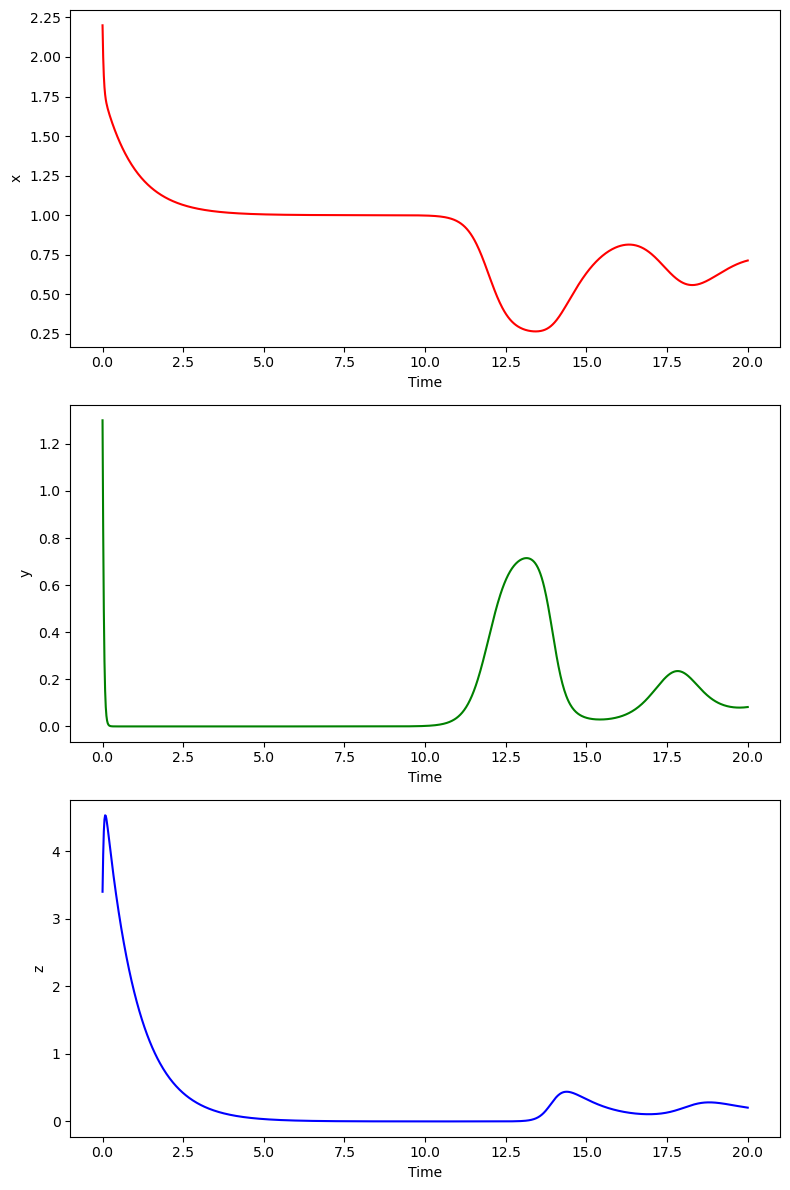

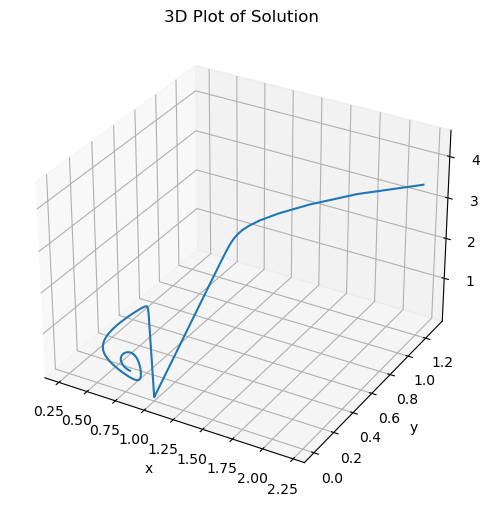

In [2]:
#Q2. Numerically solving double mass-action chemostat model
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Defining the system of equations
def model(y, t, A, B):
    x, y, z = y
    dxdt = 1 - x - A*x*y
    dydt = A*x*y - y - B*y*z
    dzdt = B*y*z - z
    return [dxdt, dydt, dzdt]

# Parameters
A = 4.0
B = 8.0

# Initial conditions
x0 = 2.2
y0 = 1.3
z0 = 3.4

# Time points
t = np.linspace(0, 20, 1000)

# Solving the differential equations
solution = odeint(model, [x0, y0, z0], t, args=(A, B))
x_solution, y_solution, z_solution = solution[:, 0], solution[:, 1], solution[:, 2]

# Plots of individual variables
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
axs[0].plot(t, x_solution, 'r')
axs[0].set_ylabel('x')
axs[1].plot(t, y_solution, 'g')
axs[1].set_ylabel('y')
axs[2].plot(t, z_solution, 'b')
axs[2].set_ylabel('z')
for ax in axs:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

# 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_solution, y_solution, z_solution)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Plot of Solution')
plt.show()
